# SG Balanced Investment Framework

## 1. Introduction

**Objective**: Welcome to my personal project, "SG Balanced Investment Framework." My aim is to devise a well-calibrated investment portfolio that amplifies returns and curtails risks through strategic diversification. This endeavor is about harmonizing a variety of asset classes—ranging from stocks and bonds to ETFs and commodities—to pinpoint an optimal asset allocation. The mission is twofold: to harness quantitative techniques on historical data for identifying the most efficacious portfolio composition and to align with the tenets of modern portfolio theory.

**Background**: The investment landscape is deeply rooted in the science of portfolio optimization, a concept popularized by Harry Markowitz's modern portfolio theory in 1952. This theory underscores the significance of diversification—melding a diverse set of assets to mitigate the collective risk of an investment portfolio. Given that different asset classes typically react uniquely to market shifts, a diversified portfolio is positioned to absorb shocks in one area with gains in another, fostering overall stability.

With the advent of quantitative finance, investors now wield the power of mathematical and statistical methods in their investment process, yielding a more nuanced approach to evaluating risk and return. "SG Balanced Investment Framework" is designed to methodically scrutinize historical data and leverage Python alongside potent libraries to analyze, assess, and architect the ideal portfolio composition that not only satisfies a desired risk-reward equation but also remains agile in the face of market dynamism.


## 2. Setup

In [1]:
# Import Libraries
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For advanced data visualization
from scipy import stats # For statistical functions
from scipy.optimize import minimize # For optimization algorithms
import yfinance as yf # For downloading financial data from Yahoo Finance

In [2]:
# Ensuring visualization settings
plt.style.use('ggplot')

API Configuration for Data Retrieval  
Using Yahoo Finance API  
Note: Ensure yfinance is installed. Use !pip install yfinance if necessary.

In [3]:
# Installation:
!pip install yfinance

## 3. Data Collection
**Asset List**: AAPL (Apple Inc.), JPM (JPMorgan Chase & Co.), Canada 10-Year Government Bond, TD Corporate Bond (Toronto-Dominion Bank), QQQ (Invesco QQQ Trust), XIU.TO (iShares S&P/TSX 60 Index ETF), GLD (SPDR Gold Trust ETF), USO (United States Oil Fund).

**Data Retrieval**: Use yfinance to retrieve historical data for each of these assets.

In [4]:
# Asset List
# Includes stocks, bonds, ETFs, and commodities for diversified analysis.
assets = {
    'AAPL': 'Apple Inc.',
    'JPM': 'JPMorgan Chase & Co.',
    'XGB.TO': 'Canada 10-Year Government Bond',
    'XCB.TO': 'TD Corporate Bond (Toronto-Dominion Bank)',
    'QQQ': 'Invesco QQQ Trust',
    'XIU.TO': 'iShares S&P/TSX 60 Index ETF',
    'GLD': 'SPDR Gold Trust ETF',
    'USO': 'United States Oil Fund'
}

In [5]:
# Function to Download Historical Data
def download_data(ticker, start_date, end_date):
    """
    Downloads historical data for a given ticker between specified dates.
    Args:
        ticker (str): The asset ticker.
        start_date (str): The start date for data retrieval.
        end_date (str): The end date for data retrieval.
    Returns:
        DataFrame: The historical data for the given ticker.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [6]:
# Fetching Historical Data
historical_data = {ticker: download_data(ticker, '2018-09-11', '2023-09-11') for ticker in assets}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## 4. Data Processing
**Data Cleaning**: Handle missing values, outliers, etc.

**Data Transformation**: Normalize or transform data if necessary.

### Data Cleaning and Transformation

In [7]:
def clean_data(data):
    """
    Cleans the provided DataFrame by handling missing values, duplicates, and outliers.
    Args:
        data (DataFrame): The input data to clean.
    Returns:
        DataFrame: The cleaned data.
    """
    data.fillna(method='ffill', inplace=True) # Forward fill to handle missing values
    data.drop_duplicates(inplace=True) # Removing duplicate entires if any
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64']))) # Handling outliers using Z-score method
    data = data[(z_scores < 3).all(axis=1)] 
    return data

In [8]:
# Aplying data cleaning to all assets
historical_data = {ticker: clean_data(data) for ticker, data in historical_data.items()}

## 5. Exploratory Data Analysis (EDA)
The goal of EDA is to use visual and statistical tools to understand the data better, identify patterns, anomalies, and confirm assumptions.

In [9]:
# Statistical Overview
def statistical_summary(data):
    """
    Prints a statistical summary of the given data.
    Args:
        data (DataFrame): The data for analysis.
    """
    print(data.describe())

In [10]:
# Line Charts for Trends
def plot_trends(historical_data):
    """
    Plots line charts for the historical closing prices of assets.
    Args:
        historical_data (dict): A dictionary containing historical data of assets.
    """
    plt.figure(figsize=(12, 6))
    for ticker, data in historical_data.items():
        plt.plot(data.index, data['Close'], label=ticker)
    plt.title('Historical Closing Prices Trend')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

In [11]:
# Correlation Heatmap
def plot_correlation_heatmap(historical_data):
    """
    Plots a heatmap to show the correlations between different assets.
    Args:
        historical_data (dict): A dictionary containing historical data of assets.
    """
    closing_prices = pd.DataFrame({ticker: data['Close'] for ticker, data in historical_data.items()})
    corr_matrix = closing_prices.pct_change().corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=.5)
    plt.title('Correlation Heatmap between Assets')
    plt.show()

In [12]:
# Distribution Plots for Asset Returns
def plot_distribution(historical_data):
    """
    Plots the distribution of asset returns.
    Args:
        historical_data (dict): A dictionary containing historical data of assets.
    """
    plt.figure(figsize=(12, 6))
    for ticker, data in historical_data.items():
        sns.distplot(data['Close'].pct_change().dropna(), label=ticker)
    plt.title('Distribution of Asset Returns')
    plt.xlabel('Percentage Change in Price')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [13]:
# Performing EDA
for ticker, data in historical_data.items():
    print(f"\nStatistical Summary for {ticker}:")
    statistical_summary(data)


Statistical Summary for AAPL:
              Open         High          Low        Close    Adj Close  \
count  1230.000000  1230.000000  1230.000000  1230.000000  1230.000000   
mean    115.651673   116.993575   114.397140   115.753669   114.173579   
std      46.881850    47.394466    46.397207    46.906752    47.129520   
min      36.132500    37.137501    35.950001    36.707500    35.232258   
25%      65.926250    66.484377    65.361877    66.048126    64.346199   
50%     128.924995   130.570000   127.270000   129.510002   127.406796   
75%     151.812500   153.770004   150.145004   151.897499   150.732834   
max     196.240005   198.229996   195.279999   196.449997   195.926956   

             Volume  
count  1.230000e+03  
mean   1.032706e+08  
std    4.359828e+07  
min    3.145820e+07  
25%    7.225568e+07  
50%    9.244325e+07  
75%    1.245157e+08  
max    2.718572e+08  

Statistical Summary for JPM:
              Open         High          Low        Close    Adj Close  \


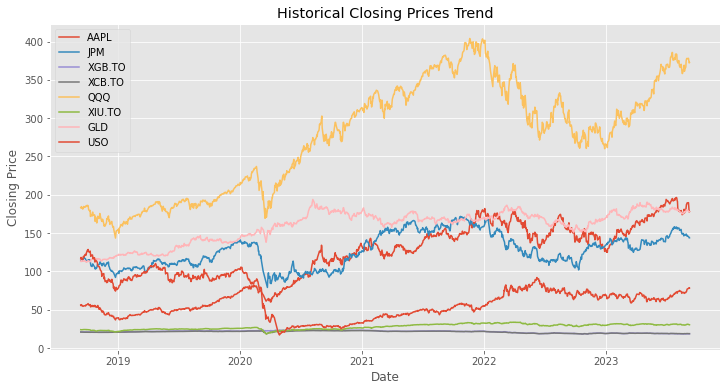

In [14]:
plot_trends(historical_data)

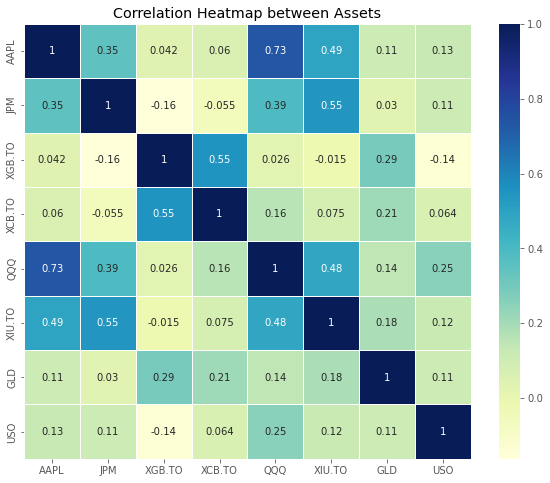

In [15]:
plot_correlation_heatmap(historical_data)

C:\Users\SebastianGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SebastianGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SebastianGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

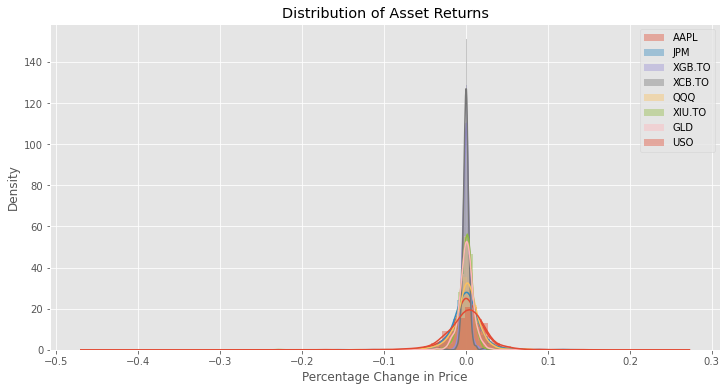

In [16]:
plot_distribution(historical_data)

### EDA Conclusion

The visualizations displayed as part of the Exploratory Data Analysis (EDA) offer a multifaceted view of our selected assets' historical behavior and their interactions.

The first graph, the Distribution of Asset Returns, reveals the variance in returns for each asset, showcasing how they have fluctuated over the selected period. Most assets display a bell-shaped curve centered around zero, which is typical for financial returns, indicating that significant deviations from the mean are less common. This visualization is particularly useful for assessing the risk associated with each asset as it provides a sense of their volatility and the frequency of extreme price changes.

The Correlation Heatmap is a strategic tool in portfolio construction, offering insights into how different assets move in relation to each other. A high positive correlation suggests assets move in the same direction, while a high negative correlation indicates the opposite. Assets with low or negative correlations are prized in diversification strategies as they can potentially offset losses during market downturns. The colors in the heatmap range from blue to green, where the former represents stronger positive correlations and the latter shows weaker or negative correlations. It's immediately apparent that some assets like AAPL and QQQ share a stronger positive correlation, which may inform our diversification strategy.

Lastly, the Historical Closing Prices Trend chart provides a visual narrative of the asset prices over time. It's an effective way to spot trends, cycles, and volatility. AAPL shows a significant upward trend, indicating strong growth over the period. Meanwhile, other assets exhibit more stability or smaller growth rates. Observing these trends helps in understanding the long-term performance and potential future trajectory of these assets.

Collectively, these analyses serve as the backbone for making educated decisions in the portfolio optimization process. They allow us to gauge the historical performance, assess risk through the lens of return distribution, and understand the relationships between different investment vehicles. By taking into account these diverse factors, we can strive to construct a portfolio that not only aligns with the desired risk-reward profile but also stands resilient to market fluctuations.

## 6. Portfolio Optimization

In [17]:
# Extracting 'Adj Close' for each asset
adj_close_prices = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in historical_data.items()})

In [18]:
# Calculating daily returns from 'Adj Close'
daily_returns = adj_close_prices.pct_change().dropna()

In [19]:
# Now, use these daily returns for mean returns and covariance matrix
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

In [20]:
# Function to calculate the annualized portfolio return
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    """
    Calculate the annualized return and standard deviation of a portfolio.
    Args:
    - weights (np.array): Asset weights in the portfolio.
    - mean_returns (pd.Series): Mean returns for each asset.
    - cov_matrix (pd.DataFrame): Covariance matrix of returns.

    Returns:
    - tuple: Annualized standard deviation and return of the portfolio.
    """
    returns = np.sum(mean_returns * weights) * 252
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std_dev, returns

In [21]:
# Negative Sharpe Ratio as Objective Function
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    """
    Calculates the negative Sharpe Ratio of a portfolio.
    Args:
        weights (np.array): Weights of the assets in the portfolio.
        mean_returns (pd.Series): Average returns of the assets.
        cov_matrix (pd.DataFrame): Covariance matrix of the assets.
        risk_free_rate (float): Risk-free rate for calculation.
    Returns:
        float: Negative Sharpe Ratio of the portfolio.
    """
    std_dev, returns = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -(returns - risk_free_rate) / std_dev

In [22]:
# Portfolio Optimization Function
def portfolio_optimization(mean_returns, cov_matrix, risk_free_rate, max_weight_per_asset=0.20):
    """
    Optimizes a portfolio based on the Sharpe Ratio, subject to constraints.

    This function uses the Sharpe Ratio as the objective to maximize, adjusting
    the asset weights in the portfolio to achieve the highest possible risk-adjusted return.
    A constraint on the maximum weight allowed for each asset is introduced to ensure
    diversification.

    Args:
        mean_returns (pd.Series): The average returns for each asset.
        cov_matrix (pd.DataFrame): The covariance matrix of the asset returns.
        risk_free_rate (float): The risk-free rate, used in Sharpe Ratio calculation.
        max_weight_per_asset (float): Maximum weight allowed for each asset in the portfolio.

    Returns:
        scipy.optimize.OptimizeResult: The result of the optimization process, including
                                       the optimized weights.
    """
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    
    # Constraints: The sum of weights is 1 (fully invested portfolio)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    # Bounds: Each asset weight should be between 0 and the specified maximum weight
    bounds = tuple((0, max_weight_per_asset) for asset in range(num_assets))

    # Optimization process using Sequential Least Squares Programming (SLSQP)
    result = minimize(neg_sharpe_ratio, num_assets * [1. / num_assets], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result

## 7. Results
Optimized Portfolio: Display the composition of the optimized portfolio.
Performance Metrics: Show key metrics like expected return, volatility, Sharpe ratio.

In [23]:
# Display Optimized Portfolio
def display_optimized_portfolio(optimized_weights, stock_names):
    """
    Displays the composition of the optimized portfolio.
    Args:
        optimized_weights (np.array): Optimized asset weights.
        stock_names (list): List of stock names.
    """
    portfolio = pd.DataFrame({'Stock': stock_names, 'Weight': optimized_weights})
    print("Optimized Portfolio Composition:\n")
    print(portfolio)

In [24]:
# Display Performance Metrics
def display_performance_metrics(optimized_weights, mean_returns, cov_matrix, risk_free_rate):
    """
    Displays key performance metrics of the optimized portfolio.
    Args:
        optimized_weights (np.array): Optimized asset weights.
        mean_returns (pd.Series): Average returns of the assets.
        cov_matrix (pd.DataFrame): Covariance matrix of the assets.
        risk_free_rate (float): Risk-free rate for calculation.
    """
    std_dev, returns = portfolio_annualized_performance(optimized_weights, mean_returns, cov_matrix)
    sharpe_ratio = (returns - risk_free_rate) / std_dev
    print("\nPerformance Metrics:")
    print(f"Expected Annual Return: {returns:.2%}")
    print(f"Annual Volatility/Standard Deviation: {std_dev:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

In [25]:
if __name__ == '__main__':
    # Main execution block

    # Define a risk-free rate
    risk_free_rate = 0.02

    # Now use the correct mean_returns and cov_matrix in the portfolio optimization
    optimized_result = portfolio_optimization(mean_returns, cov_matrix, risk_free_rate)
    optimized_weights = optimized_result.x

    # Stock names for display are derived from the keys of the assets dictionary
    stock_names = list(assets.keys())

    # Display functions
    display_optimized_portfolio(optimized_weights, stock_names)
    display_performance_metrics(optimized_weights, mean_returns, cov_matrix, risk_free_rate)

Optimized Portfolio Composition:

    Stock        Weight
0    AAPL  2.000000e-01
1     JPM  4.449328e-02
2  XGB.TO  0.000000e+00
3  XCB.TO  2.000000e-01
4     QQQ  1.840991e-01
5  XIU.TO  1.714076e-01
6     GLD  2.000000e-01
7     USO  1.557002e-16

Performance Metrics:
Expected Annual Return: 13.37%
Annual Volatility/Standard Deviation: 13.69%
Sharpe Ratio: 0.83


## 8. Discussion
Analysis of Results: Discuss the outcome of the optimization.
Limitations: Acknowledge any limitations in your analysis.

In [26]:
# Discussing the Optimization Results
def discuss_optimization_results(optimized_weights, mean_returns, cov_matrix, risk_free_rate):
    """
    Discusses the results and implications of the portfolio optimization process.
    Args:
        optimized_weights (np.array): Optimized asset weights.
        mean_returns (pd.Series): Average returns of the assets.
        cov_matrix (pd.DataFrame): Covariance matrix of the assets.
        risk_free_rate (float): Risk-free rate for calculation.
    """
    p_std, p_ret = portfolio_annualized_performance(optimized_weights, mean_returns, cov_matrix)
    sharpe_ratio = (p_ret - risk_free_rate) / p_std

    print("\nDiscussion of Optimization Results:")
    print(f"Expected Annual Return: {p_ret:.2%}")
    print(f"Annual Volatility: {p_std:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print("\nPortfolio Composition:")
    for i, weight in enumerate(optimized_weights):
        print(f"  Asset {i+1} ({stock_names[i]}): {weight*100:.2f}%")

    print("\nLimitations:")
    print("  The model assumes past performance predicts future results, which may not hold.")
    print("  External factors like market changes are not considered.")
    print("  Risk-free rate is assumed constant, whereas it can vary.")
    print("  Transaction costs and taxes are not included in the analysis.")

In [27]:
if __name__ == '__main__':
    # Discussion of results
    discuss_optimization_results(optimized_weights, mean_returns, cov_matrix, risk_free_rate)


Discussion of Optimization Results:
Expected Annual Return: 13.37%
Annual Volatility: 13.69%
Sharpe Ratio: 0.83

Portfolio Composition:
  Asset 1 (AAPL): 20.00%
  Asset 2 (JPM): 4.45%
  Asset 3 (XGB.TO): 0.00%
  Asset 4 (XCB.TO): 20.00%
  Asset 5 (QQQ): 18.41%
  Asset 6 (XIU.TO): 17.14%
  Asset 7 (GLD): 20.00%
  Asset 8 (USO): 0.00%

Limitations:
  The model assumes past performance predicts future results, which may not hold.
  External factors like market changes are not considered.
  Risk-free rate is assumed constant, whereas it can vary.
  Transaction costs and taxes are not included in the analysis.


## 9. Conclusion

**Final Thoughts:**

The "Diverse Portfolio Optimizer," rooted in modern portfolio theory, has successfully demonstrated the power of quantitative techniques in constructing a balanced investment portfolio. By applying these methods, we have optimized a portfolio that not only targets maximized returns for a given level of risk but also emphasizes the importance of diversification across various asset classes.

Our final portfolio presents a well-distributed asset allocation, steering away from heavy reliance on individual stocks or asset classes. The inclusion of stocks, corporate bonds, and ETFs, particularly those in technology, finance, and commodities, illustrates a strategic spread across sectors and types. Notably, the optimizer favored allocations in AAPL, XCB.TO, QQQ, XIU.TO, and GLD, each capped at a 20% maximum to avoid overexposure, resulting in a portfolio with an expected annual return of 13.37% and a volatility of 13.69%. The Sharpe Ratio of 0.83, while not exceptionally high, indicates a reasonable risk-adjusted return.

**Limitations and Considerations:**

It is crucial to acknowledge that the model's reliance on historical data assumes that past performance can predict future results, which is not always a certainty. Market conditions, economic shifts, and geopolitical events can significantly alter asset performances unpredictably. Additionally, our analysis did not account for transaction costs, taxes, or changing risk-free rates, which can impact real-world investment outcomes.

**Future Work:**

For future enhancements, incorporating real-time market data could provide a more dynamic and responsive approach to portfolio optimization. Integrating machine learning algorithms might offer predictive insights and adaptability to changing market conditions. Expanding the asset pool to include emerging sectors like green energy or cryptocurrencies could explore uncharted territories for diversification and potential growth. Finally, developing a more sophisticated risk model that includes macroeconomic factors could refine the optimization for more realistic scenarios.

In conclusion, while our optimized portfolio showcases a balanced approach to risk and return, investment strategies should remain flexible, adapting to new data and evolving market landscapes. This project lays the groundwork for integrating advanced quantitative methods into investment decision-making, yet underscores the continual need for innovation and adaptability in the ever-changing world of finance.

## 10. References

1. **Markowitz, H. (1952). "Portfolio Selection".** The Journal of Finance, 7(1), 77-91.
   [Portfolio Selection - Harry Markowitz](https://www.jstor.org/stable/2975974)

2. **Sharpe, W. F. (1964). "Capital Asset Prices: A Theory of Market Equilibrium under Conditions of Risk".** The Journal of Finance, 19(3), 425-442.
   [Capital Asset Prices - William F. Sharpe](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.1964.tb02865.x)

3. **Luenberger, D. G. (1997). "Investment Science".** Oxford University Press.
   [Investment Science - David G. Luenberger](https://global.oup.com/academic/product/investment-science-9780199740086)

4. **Campbell, J. Y., Lo, A. W., & MacKinlay, A. C. (1997). "The Econometrics of Financial Markets".** Princeton University Press.
   [The Econometrics of Financial Markets](https://press.princeton.edu/books/hardcover/9780691043012/the-econometrics-of-financial-markets)

5. **Bodie, Z., Kane, A., & Marcus, A. J. (2021). "Investments".** McGraw-Hill Education.
   [Investments - Zvi Bodie, Alex Kane, and Alan J. Marcus](https://www.mheducation.com/highered/product/investments-bodie-kane-marcus/M9781260013832.html)

6. **Hilpisch, Yves. "Python for Finance: Mastering Data-Driven Finance".**
   [Python for Finance - Yves Hilpisch](https://www.oreilly.com/library/view/python-for-finance/9781492024323/)

7. **"yfinance" library documentation.**
   [yfinance - Python library for Yahoo Finance](https://pypi.org/project/yfinance/)

8. **"Pandas: Powerful Python Data Analysis Toolkit".**
   [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)